In [155]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
from itertools import product

# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")
# ワクチン接種者
vaccine = pd.read_json('https://data.vrs.digital.go.jp/vaccination/opendata/latest/prefecture.ndjson', lines=True)
vaccine["date"] = pd.to_datetime(vaccine["date"])

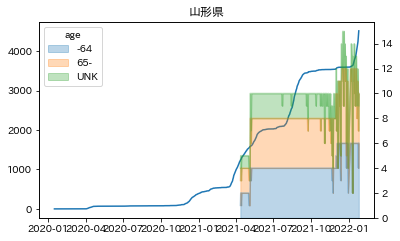

In [156]:
pref_ID = 6
pref = JP_pref[pref_ID]
pref_vc = vaccine[vaccine["prefecture"]==pref_ID].groupby(["date", "age"]).count()["count"].unstack().fillna(0).astype(int)
plt.plot(pref_nc.index, pref_nc)
ax2 = plt.gca().twinx()
pref_vc.plot.area(ax=ax2, alpha=0.3)
plt.title(pref)
plt.show()
#plt.legend()

In [157]:
pref_nc = new_case[EN_pref[pref_ID]].cumsum()

In [162]:
pref_vc_1 = vaccine[(vaccine["prefecture"]==pref_ID) & (vaccine["status"]==1)].groupby(["date", "age"]).count()["count"].unstack().fillna(0).astype(int)
pref_vc_2 = vaccine[(vaccine["prefecture"]==pref_ID) & (vaccine["status"]==2)].groupby(["date", "age"]).count()["count"].unstack().fillna(0).astype(int)
pref_vc_3 = vaccine[(vaccine["prefecture"]==pref_ID) & (vaccine["status"]==3)].groupby(["date", "age"]).count()["count"].unstack().fillna(0).astype(int)

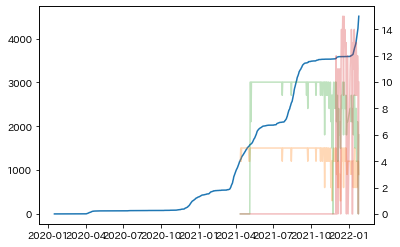

In [159]:
plt.plot(pref_nc)
ax2 = plt.gca().twinx()
plt.plot(pref_vc_1.sum(axis=1), color="C1", alpha=0.3)
plt.plot(pref_vc_2.sum(axis=1), color="C2", alpha=0.3)
plt.plot(pref_vc_3.sum(axis=1), color="C3", alpha=0.3)


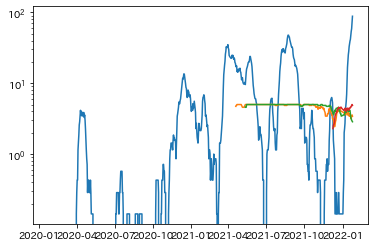

In [186]:
fig, ax0 = plt.subplots(1,1)
ax0.plot(pref_nc.diff().rolling(7).mean())
ax0.plot(pref_vc_1.sum(axis=1).rolling(7).mean(), color="C1")
ax0.plot(pref_vc_2.sum(axis=1).rolling(7).mean(), color="C2")
ax0.plot(pref_vc_3.sum(axis=1).rolling(7).mean(), color="C3")
ax0.set_yscale('log')
